# Q2 Problem 1

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as gobj
import plotly.graph_objects as go
from datetime import datetime
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the data file and since the default seperator wasn't used, the actual seperator [;] was specified.
pd.read_csv('HW 3-winequality-white.csv', sep = "[;]")

"fixed acidity"  "volatile acidity"  "citric acid"  "residual sugar"  \
0                 7.0                0.27           0.36              20.7   
1                 6.3                0.30           0.34               1.6   
2                 8.1                0.28           0.40               6.9   
3                 7.2                0.23           0.32               8.5   
4                 7.2                0.23           0.32               8.5   
...               ...                 ...            ...               ...   
4893              6.2                0.21           0.29               1.6   
4894              6.6                0.32           0.36               8.0   
4895              6.5                0.24           0.19               1.2   
4896              5.5                0.29           0.30               1.1   
4897              6.0                0.21           0.38               0.8   

      "chlorides"  "free sulfur dioxide"  "total sulfur dioxide"  "density"  \
0           0.045                   45.0                   170.0    1.00100   
1           0.049                   14.0                   132.0    0.99400   
2           0.050                   30.0                    97.0    0.99510   
3           0.058                   47.0                   186.0    0.99560   
4           0.058                   47.0                   186.0    0.99560   
...           ...                    ...                     ...        ...   
4893        0.039                   24.0                    92.0    0.99114   
4894        0.047                   57.0                   168.0    0.99490   
4895        0.041                   30.0                   111.0    0.99254   
4896        0.022                   20.0                   110.0    0.98869   
4897        0.020                   22.0                    98.0    0.98941   

      "pH"  "sulphates"  "alcohol"  "quality"  
0     3.00         0.45        8.8          6  
1     3.30         0.49        9.5          6  
2     3.26         0.44       10.1          6  
3     3.19         0.40        9.9          6  
4     3.19         0.40        9.9          6  
...    ...          ...        ...        ...  
4893  3.27         0.50       11.2          6  
4894  3.15         0.46        9.6          5  
4895  2.99         0.46        9.4          6  
4896  3.34         0.38       12.8          7  
4897  3.26         0.32       11.8          6  

[4898 rows x 12 columns]

In [4]:
#Assigns a variable df to the data
df = pd.read_csv('HW 3-winequality-white.csv', sep = "[;]")

In [5]:
# Renames the columns of the dataset
df.columns = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality']

In [6]:
#Categorizing the wine quality using the stated label.
df_Quality = pd.cut(df['Quality'], [0, 4, 5, 7, 10], labels = ["Low", "Medium-low", "Medium-high", "High"])

In [8]:
WW = df.drop(['Quality'], axis=1)
WW

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      Alcohol  
0         8.8  
1         9.5  
2        10.1  
3         9.9  
4         9.9  
...       ...  
4893     11.2  
4894      9.6  
4895      9.4  
4896     12.8  
4897     11.8  

[4898 rows x 11 columns]

In [65]:
# Joins the (wine quality category), with the dataset 
White_Wine = pd.concat([WW, df_Quality], axis = 1)

# Renames the (wine quality category) to 'Wine Quality'
White_Wine.columns = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Wine_Quality']

In [85]:
White_Wine = White_Wine.sort_values('Wine_Quality')
White_Wine.head()

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
1484            7.5             0.320         0.24             4.6      0.053   
4804            6.0             0.350         0.46             0.9      0.033   
147             6.4             0.595         0.14             5.2      0.058   
3179            8.5             0.200         0.40             1.1      0.046   
278             6.8             0.320         0.34             1.2      0.044   

      Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
1484                  8.0                 134.0  0.99580  3.14       0.50   
4804                  9.0                  65.0  0.98934  3.24       0.35   
147                  15.0                  97.0  0.99510  3.38       0.36   
3179                 31.0                 106.0  0.99194  3.00       0.35   
278                  14.0                  67.0  0.99190  3.05       0.47   

      Alcohol Wine_Quality  
1484      9.1          Low  
4804     12.1          Low  
147       9.0          Low  
3179     10.5          Low  
278      10.6          Low

In [69]:
#Gets the Low Quality Wine Category
Low = White_Wine.groupby('Wine_Quality').get_group('Low')
Low

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
46              6.2             0.450         0.26            4.40      0.063   
98              9.8             0.360         0.46           10.50      0.038   
115             5.5             0.485         0.00            1.50      0.065   
147             6.4             0.595         0.14            5.20      0.058   
172             7.6             0.480         0.37            0.80      0.037   
...             ...               ...          ...             ...        ...   
4774            7.1             0.240         0.34            1.20      0.045   
4779            6.0             0.590         0.00            0.80      0.037   
4804            6.0             0.350         0.46            0.90      0.033   
4839            5.2             0.405         0.15            1.45      0.038   
4878            6.2             0.530         0.02            0.90      0.035   

      Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
46                   63.0                 206.0  0.99400  3.27       0.52   
98                    4.0                  83.0  0.99560  2.89       0.30   
115                   8.0                 103.0  0.99400  3.63       0.40   
147                  15.0                  97.0  0.99510  3.38       0.36   
172                   4.0                 100.0  0.99020  3.03       0.39   
...                   ...                   ...      ...   ...        ...   
4774                  6.0                 132.0  0.99132  3.16       0.46   
4779                 30.0                  95.0  0.99032  3.10       0.40   
4804                  9.0                  65.0  0.98934  3.24       0.35   
4839                 10.0                  44.0  0.99125  3.52       0.40   
4878                  6.0                  81.0  0.99234  3.24       0.35   

      Alcohol Wine_Quality  
46        9.8          Low  
98       10.1          Low  
115       9.7          Low  
147       9.0          Low  
172      11.4          Low  
...       ...          ...  
4774     11.2          Low  
4779     10.9          Low  
4804     12.1          Low  
4839     11.6          Low  
4878      9.5          Low  

[183 rows x 12 columns]

In [70]:
#Gets the Medium_Low Wine Category
Medium_low = White_Wine.groupby('Wine_Quality').get_group('Medium-low')
Medium_low

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
10              8.1              0.27         0.41            1.45      0.033   
11              8.6              0.23         0.40            4.20      0.035   
12              7.9              0.18         0.37            1.20      0.040   
14              8.3              0.42         0.62           19.25      0.040   
19              6.5              0.31         0.14            7.50      0.044   
...             ...               ...          ...             ...        ...   
4882            5.5              0.32         0.13            1.30      0.037   
4884            6.5              0.33         0.38            8.30      0.048   
4888            6.8              0.22         0.36            1.20      0.052   
4892            6.5              0.23         0.38            1.30      0.032   
4894            6.6              0.32         0.36            8.00      0.047   

      Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
10                   11.0                  63.0  0.99080  2.99       0.56   
11                   17.0                 109.0  0.99470  3.14       0.53   
12                   16.0                  75.0  0.99200  3.18       0.63   
14                   41.0                 172.0  1.00020  2.98       0.67   
19                   34.0                 133.0  0.99550  3.22       0.50   
...                   ...                   ...      ...   ...        ...   
4882                 45.0                 156.0  0.99184  3.26       0.38   
4884                 68.0                 174.0  0.99492  3.14       0.50   
4888                 38.0                 127.0  0.99330  3.04       0.54   
4892                 29.0                 112.0  0.99298  3.29       0.54   
4894                 57.0                 168.0  0.99490  3.15       0.46   

      Alcohol Wine_Quality  
10       12.0   Medium-low  
11        9.7   Medium-low  
12       10.8   Medium-low  
14        9.7   Medium-low  
19        9.5   Medium-low  
...       ...          ...  
4882     10.7   Medium-low  
4884      9.6   Medium-low  
4888      9.2   Medium-low  
4892      9.7   Medium-low  
4894      9.6   Medium-low  

[1457 rows x 12 columns]

In [71]:
# Gets the Medium_High Quality Wine Group
Medium_high = White_Wine.groupby('Wine_Quality').get_group('Medium-high')
Medium_high

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4891            5.7              0.21         0.32             0.9      0.038   
4893            6.2              0.21         0.29             1.6      0.039   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4891                 38.0                 121.0  0.99074  3.24       0.46   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      Alcohol Wine_Quality  
0         8.8  Medium-high  
1         9.5  Medium-high  
2        10.1  Medium-high  
3         9.9  Medium-high  
4         9.9  Medium-high  
...       ...          ...  
4891     10.6  Medium-high  
4893     11.2  Medium-high  
4895      9.4  Medium-high  
4896     12.8  Medium-high  
4897     11.8  Medium-high  

[3078 rows x 12 columns]

In [72]:
# Gets High Quality wine Category 
High = White_Wine.groupby('Wine_Quality').get_group('High')
High

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
17              6.2             0.660         0.48             1.2      0.029   
20              6.2             0.660         0.48             1.2      0.029   
22              6.8             0.260         0.42             1.7      0.049   
68              6.7             0.230         0.31             2.1      0.046   
74              6.7             0.230         0.31             2.1      0.046   
...             ...               ...          ...             ...        ...   
4765            5.2             0.300         0.34             1.5      0.038   
4766            6.4             0.320         0.25             5.0      0.055   
4786            4.4             0.320         0.39             4.3      0.030   
4787            3.9             0.225         0.40             4.2      0.030   
4802            5.8             0.280         0.34             2.2      0.037   

      Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
17                   29.0                  75.0  0.98920  3.33       0.39   
20                   29.0                  75.0  0.98920  3.33       0.39   
22                   41.0                 122.0  0.99300  3.47       0.48   
68                   30.0                  96.0  0.99260  3.33       0.64   
74                   30.0                  96.0  0.99260  3.33       0.64   
...                   ...                   ...      ...   ...        ...   
4765                 18.0                  96.0  0.98942  3.56       0.48   
4766                 28.0                 138.0  0.99171  3.27       0.50   
4786                 31.0                 127.0  0.98904  3.46       0.36   
4787                 29.0                 118.0  0.98900  3.57       0.36   
4802                 24.0                 125.0  0.98986  3.36       0.33   

      Alcohol Wine_Quality  
17       12.8         High  
20       12.8         High  
22       10.5         High  
68       10.7         High  
74       10.7         High  
...       ...          ...  
4765     13.0         High  
4766     12.4         High  
4786     12.8         High  
4787     12.8         High  
4802     12.8         High  

[180 rows x 12 columns]

In [9]:
#Correlation Matrix, to check Correlation between Variables
corr = WW.corr()
corr

Fixed Acidity  Volatile Acidity  Citric Acid  \
Fixed Acidity              1.000000         -0.022697     0.289181   
Volatile Acidity          -0.022697          1.000000    -0.149472   
Citric Acid                0.289181         -0.149472     1.000000   
Residual Sugar             0.089021          0.064286     0.094212   
Chlorides                  0.023086          0.070512     0.114364   
Free Sulfur Dioxide       -0.049396         -0.097012     0.094077   
Total Sulfur Dioxide       0.091070          0.089261     0.121131   
Density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
Sulphates                 -0.017143         -0.035728     0.062331   
Alcohol                   -0.120881          0.067718    -0.075729   

                      Residual Sugar  Chlorides  Free Sulfur Dioxide  \
Fixed Acidity               0.089021   0.023086            -0.049396   
Volatile Acidity            0.064286   0.070512            -0.097012   
Citric Acid                 0.094212   0.114364             0.094077   
Residual Sugar              1.000000   0.088685             0.299098   
Chlorides                   0.088685   1.000000             0.101392   
Free Sulfur Dioxide         0.299098   0.101392             1.000000   
Total Sulfur Dioxide        0.401439   0.198910             0.615501   
Density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
Sulphates                  -0.026664   0.016763             0.059217   
Alcohol                    -0.450631  -0.360189            -0.250104   

                      Total Sulfur Dioxide   Density        pH  Sulphates  \
Fixed Acidity                     0.091070  0.265331 -0.425858  -0.017143   
Volatile Acidity                  0.089261  0.027114 -0.031915  -0.035728   
Citric Acid                       0.121131  0.149503 -0.163748   0.062331   
Residual Sugar                    0.401439  0.838966 -0.194133  -0.026664   
Chlorides                         0.198910  0.257211 -0.090439   0.016763   
Free Sulfur Dioxide               0.615501  0.294210 -0.000618   0.059217   
Total Sulfur Dioxide              1.000000  0.529881  0.002321   0.134562   
Density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
Sulphates                         0.134562  0.074493  0.155951   1.000000   
Alcohol                          -0.448892 -0.780138  0.121432  -0.017433   

                       Alcohol  
Fixed Acidity        -0.120881  
Volatile Acidity      0.067718  
Citric Acid          -0.075729  
Residual Sugar       -0.450631  
Chlorides            -0.360189  
Free Sulfur Dioxide  -0.250104  
Total Sulfur Dioxide -0.448892  
Density              -0.780138  
pH                    0.121432  
Sulphates            -0.017433  
Alcohol               1.000000

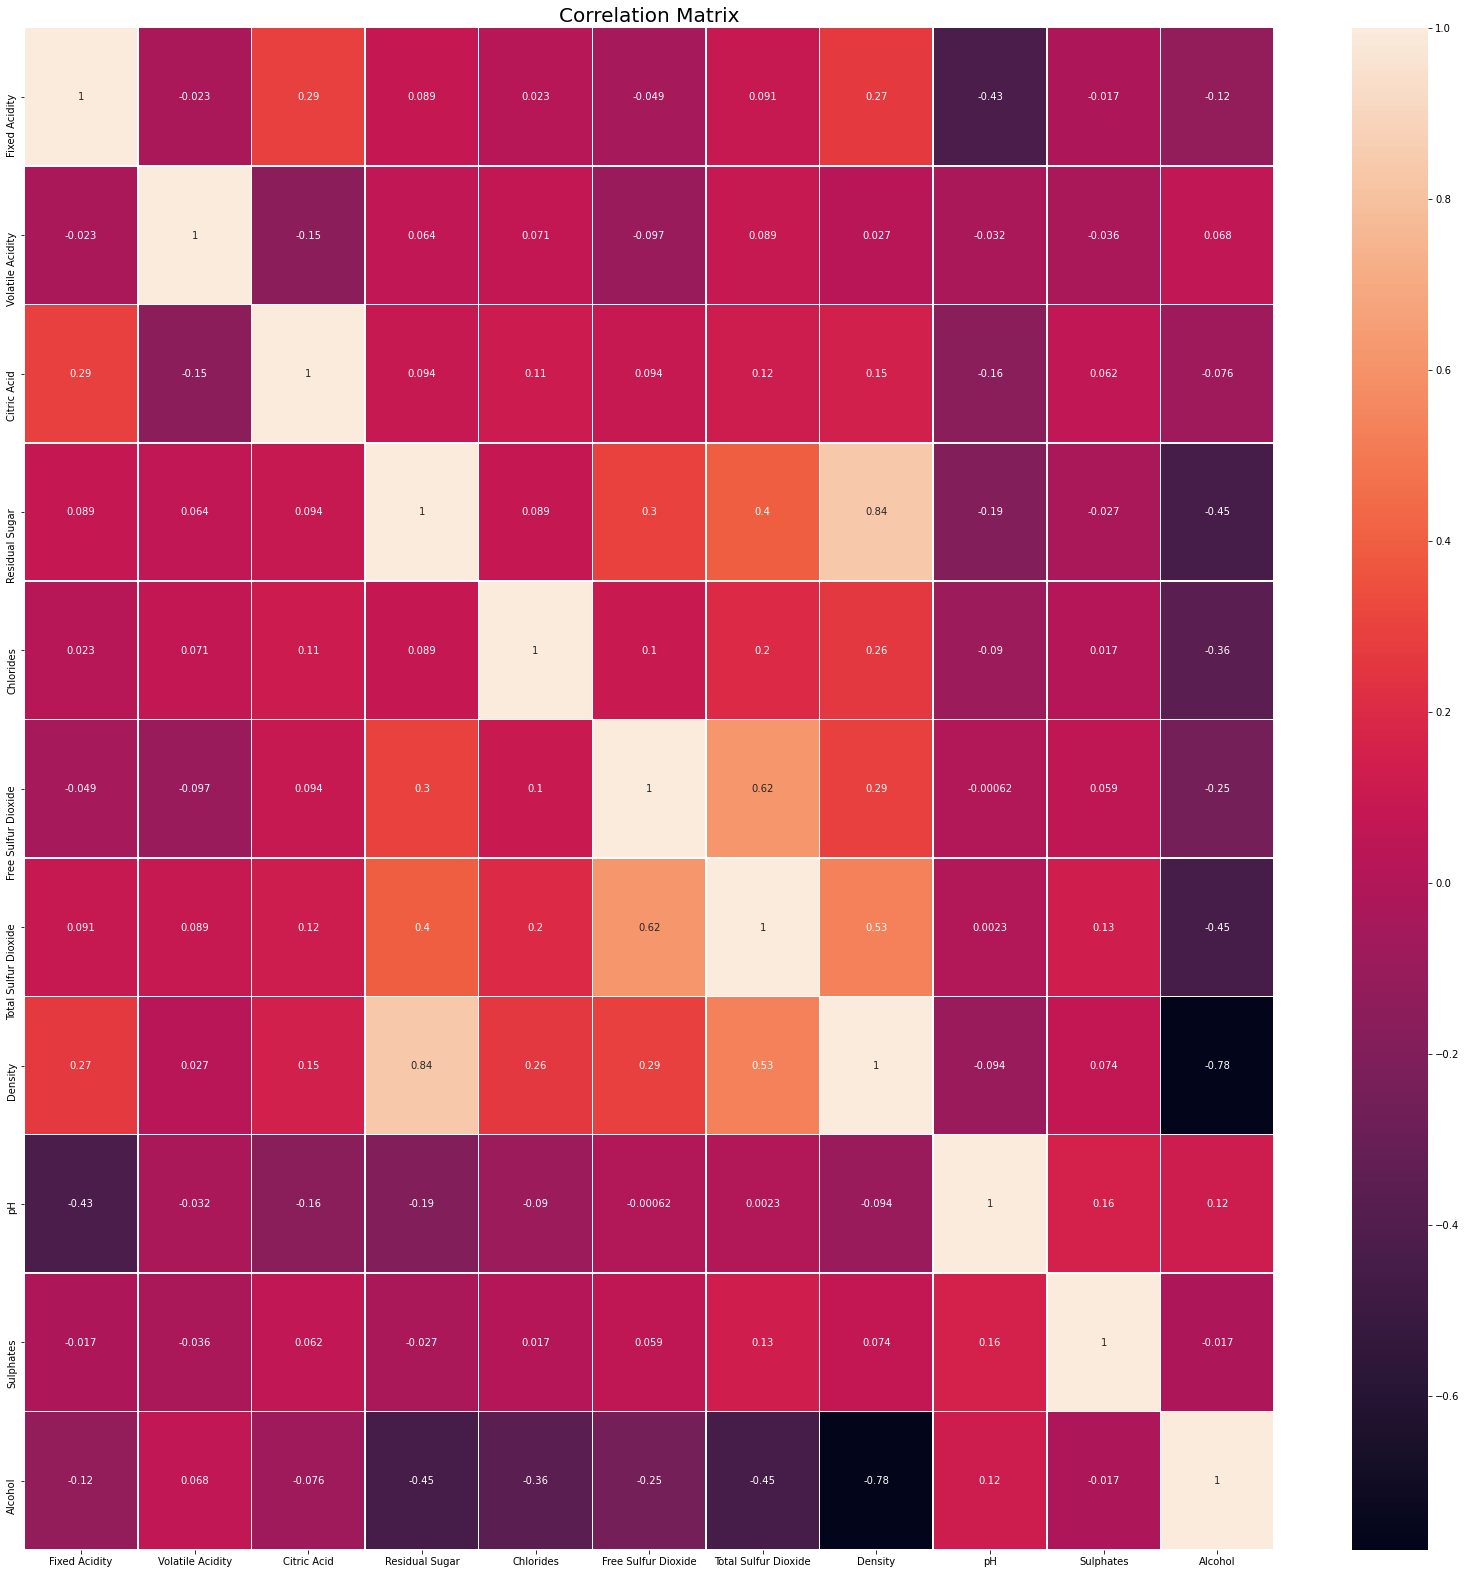

In [10]:
plt.figure(figsize=(28,28))
plt.title('Correlation Matrix',fontdict = {'fontsize' : 20})
H =sns.heatmap(corr, annot=True,linewidths=.5)

# High Correlation between Density and (Residual Sugar and Alcohol)

# Problem 1B

In [73]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(WW, df_Quality, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3918, 11)
(980, 11)
(3918,)
(980,)


In [16]:
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

GaussianNB()

In [17]:
Y_pred = gnb.predict(X_test)

In [74]:
acc = accuracy_score(Y_test, Y_pred)
print(f'Accuracy Score = {acc}')


Accuracy Score = 0.6428571428571429


In [75]:
cr = classification_report(Y_test, Y_pred)
print('\nClassification Report Table:' f'\n{cr}')



Classification Report Table:
              precision    recall  f1-score   support

        High       0.08      0.03      0.04        35
         Low       0.23      0.30      0.26        30
 Medium-high       0.74      0.75      0.74       624
  Medium-low       0.52      0.53      0.52       291

    accuracy                           0.64       980
   macro avg       0.39      0.40      0.39       980
weighted avg       0.64      0.64      0.64       980



In [77]:
precision = precision_score(Y_test, Y_pred, average = 'micro')
print(f'Precision = {precision}')


Precision = 0.6428571428571429


Confusion matrix, without normalization
[[  1   1  31   2]
 [  0   9  12   9]
 [ 12  12 466 134]
 [  0  18 119 154]]
Normalized confusion matrix
[[0.02857143 0.02857143 0.88571429 0.05714286]
 [0.         0.3        0.4        0.3       ]
 [0.01923077 0.01923077 0.74679487 0.21474359]
 [0.         0.06185567 0.40893471 0.52920962]]


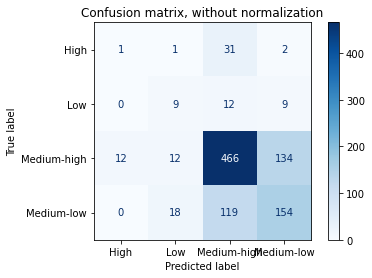

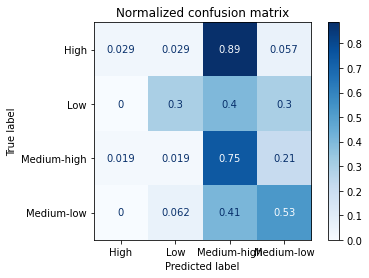

In [21]:
#Confusion Matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gnb, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Q4 Problem 3

## Q4.1 Problem 3. (a)

In [22]:
# SVM classifier

from sklearn import svm

In [23]:
classifier = svm.SVC()
classifier.fit(X_train, Y_train)

SVC()

In [24]:
Y_Predict = classifier.predict(X_test)

In [78]:
acc = accuracy_score(Y_test, Y_Predict)
print(f'Accuracy Score = {acc}')

Accuracy Score = 0.636734693877551


In [79]:
cr = classification_report(Y_test, Y_Predict)
print('\nClassification Report Table:' f'\n{cr}')



Classification Report Table:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        35
         Low       0.00      0.00      0.00        30
 Medium-high       0.64      1.00      0.78       624
  Medium-low       0.00      0.00      0.00       291

    accuracy                           0.64       980
   macro avg       0.16      0.25      0.19       980
weighted avg       0.41      0.64      0.50       980



In [80]:
precision_recall_fscore_support(Y_test, Y_Predict, average='micro')

(0.636734693877551, 0.636734693877551, 0.636734693877551, None)

Confusion matrix, without normalization
[[  0   0  35   0]
 [  0   1  28   1]
 [  0   0 623   1]
 [  0   0 289   2]]
Normalized confusion matrix
[[0.         0.         1.         0.        ]
 [0.         0.03333333 0.93333333 0.03333333]
 [0.         0.         0.99839744 0.00160256]
 [0.         0.         0.99312715 0.00687285]]


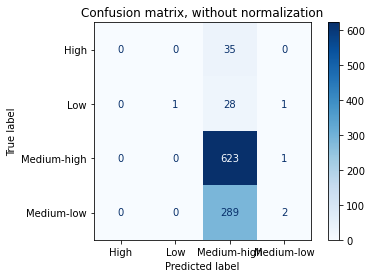

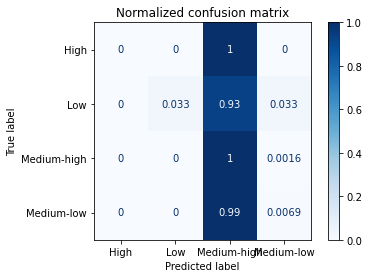

In [81]:
# Confusion Matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Q4.2 Problem 3. (b)

In [28]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [29]:
C = []
Y = []

for i in range (10, 501, 10):
    classifier = svm.SVC(C=i/100)
    classifier.fit(X_train, Y_train)
    
    scores = cross_validate(classifier, X_train, Y_train, scoring = "f1_micro", return_train_score=True)
    Train_Score = scores['train_score']
    Train_Score.mean()
    
    
    
    C.append(i/100)
    Y.append(Train_Score.mean())

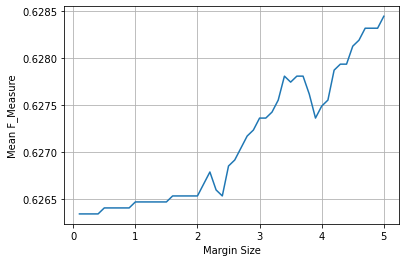

In [30]:
fig, ax = plt.subplots()
ax.plot(C, Y)

ax.set(xlabel='Margin Size', ylabel='Mean F_Measure')
ax.grid()

fig.savefig("test.png")
plt.show()


# It was observed that, as the Margin size increased, so did the Average F_Measure

# Q5.1 Problem 4. (a)

In [50]:
# Default Decision Tree

from sklearn import tree
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
from pydotplus import graph_from_dot_data
import pydotplus as pdp
from sklearn.metrics import classification_report

In [32]:
d_tree = tree.DecisionTreeClassifier()
d_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [33]:
YPred = d_tree.predict(X_test)

In [82]:
acc = accuracy_score(Y_test, YPred)
print(f' Accuracy Score = {acc}')

 Accuracy Score = 0.7295918367346939


In [52]:
cr = classification_report(Y_test, YPred)
print('\nClassification Report Table:' f'\n{cr}')



Classification Report Table:
              precision    recall  f1-score   support

        High       0.40      0.49      0.44        35
         Low       0.29      0.37      0.32        30
 Medium-high       0.82      0.80      0.81       624
  Medium-low       0.64      0.64      0.64       291

    accuracy                           0.73       980
   macro avg       0.54      0.57      0.55       980
weighted avg       0.74      0.73      0.73       980



In [83]:
# Precision | Recall | FScore and Support

precision_recall_fscore_support(Y_test, YPred, average='micro')

(0.7295918367346939, 0.7295918367346939, 0.7295918367346939, None)

Confusion matrix, without normalization
[[ 17   0  17   1]
 [  0  11   7  12]
 [ 22  10 502  90]
 [  4  17  85 185]]
Normalized confusion matrix
[[0.48571429 0.         0.48571429 0.02857143]
 [0.         0.36666667 0.23333333 0.4       ]
 [0.03525641 0.01602564 0.80448718 0.14423077]
 [0.0137457  0.05841924 0.29209622 0.63573883]]


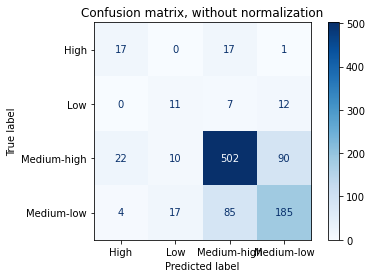

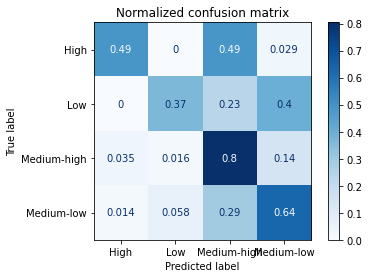

In [36]:
#Confusion Matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(d_tree, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [46]:
#Decision Tree using different parameters

n = [] # Parameter changes from 2, ... to 10
Y1 = [] # Mean Train_Score
Y2 = [] # Mean Test_Score


for i in range (2, 11, 1):
    D_tree = tree.DecisionTreeClassifier(max_depth = i, min_samples_split = i, max_features = i)
    D_tree.fit(X_train, Y_train)
    
    
    scores = cross_validate(D_tree, X_train, Y_train, scoring = "f1_micro", cv = 5, return_train_score=True) # Default CV = 5
    Train_Score = scores['train_score']
    Train_Score.mean()
    
    Test_Score = scores['test_score']
    Test_Score.mean()
    
    
    n.append(i)
    Y1.append(Train_Score.mean())
    Y2.append(Test_Score.mean())

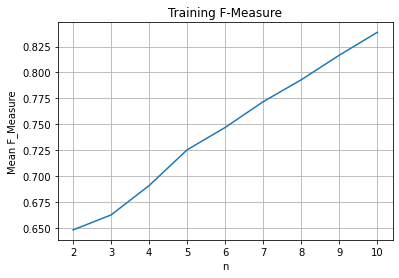

In [47]:
#Training F-Measure Plot

fig, ax = plt.subplots()
ax.plot(n, Y1)

ax.set(xlabel='n', ylabel='Mean F_Measure', title = "Training F-Measure")

ax.grid()

fig.savefig("test.png")
plt.show()


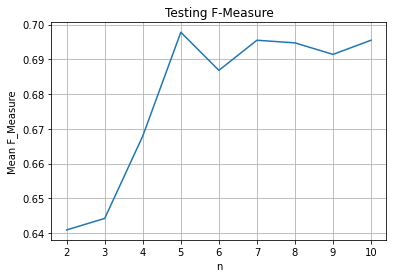

In [48]:
#Testing F-Measure Plot

fig, ax = plt.subplots()
ax.plot(n, Y2)

ax.set(xlabel='n', ylabel='Mean F_Measure', title = "Testing F-Measure")
ax.grid()

fig.savefig("test.png")
plt.show()


# From the graph, it can be seen that for the changing parameters, the training dataset provided better F-Measure than the testing dataset, this indicates Overfitting because it means the model perfoms better on the training dataset than the testing dataset. 

### Decision Tree using Graphviz

In [53]:
# columns name of the dataset
WW.columns = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']

In [57]:
dot_data = StringIO()
export_graphviz(d_tree, out_file=dot_data, feature_names=WW.columns,
filled=True, rounded=True,
special_characters=True)
graph = pdp.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.721057 to fit



[Text(138.7222108218835, 213.55714285714285, 'X[10] <= 10.017\ngini = 0.516\nsamples = 3918\nvalue = [145, 153, 2454, 1166]'),
 Text(58.892989366809765, 205.79142857142858, 'X[1] <= 0.237\ngini = 0.552\nsamples = 1676\nvalue = [19, 74, 773, 810]'),
 Text(22.11260957975599, 198.0257142857143, 'X[3] <= 6.45\ngini = 0.449\nsamples = 555\nvalue = [18, 10, 387, 140]'),
 Text(12.155978309986445, 190.26, 'X[5] <= 26.5\ngini = 0.506\nsamples = 203\nvalue = [1, 7, 123, 72]'),
 Text(6.293574333483959, 182.4942857142857, 'X[6] <= 99.5\ngini = 0.534\nsamples = 81\nvalue = [0, 3, 37, 41]'),
 Text(3.1467871667419796, 174.72857142857143, 'X[4] <= 0.031\ngini = 0.489\nsamples = 37\nvalue = [0, 1, 23, 13]'),
 Text(2.6626660641662903, 166.96285714285713, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4]'),
 Text(3.6309082693176684, 166.96285714285713, 'X[10] <= 9.75\ngini = 0.439\nsamples = 33\nvalue = [0, 1, 23, 9]'),
 Text(2.4206055128784456, 159.19714285714286, 'X[5] <= 22.0\ngini = 0.56\nsamples = 15\n

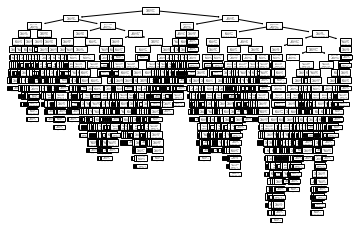

In [58]:
tree.plot_tree(d_tree) 